# Part I - Ford Bike-sharing System Analysis
## by Chidubem Nwodo

## Introduction
This data set includes information about individual rides made in a ford bike-sharing system covering the greater San Francisco Bay area. It has 16 columns and 183412 entries.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset into pandas dataframe
ford_bike1 = pd.read_csv('fordgobike.csv', parse_dates=['start_time', 'end_time'])

In [3]:
# Making a copy of the dataset
ford_bike = ford_bike1.copy()
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
print(ford_bike.info())
print(ford_bike.shape)
print(ford_bike.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [5]:
# Checking for columns with null values
ford_bike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Let's drop the column that do not have any NaN/None values so we can plot missing values
na_counts = ford_bike.drop(['duration_sec', 'start_time', 'end_time','start_station_latitude', 'start_station_longitude', 'end_station_longitude','end_station_latitude', 'bike_id', 'user_type', 'bike_share_for_all_trip'], axis=1).isna().sum()
na_counts

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64

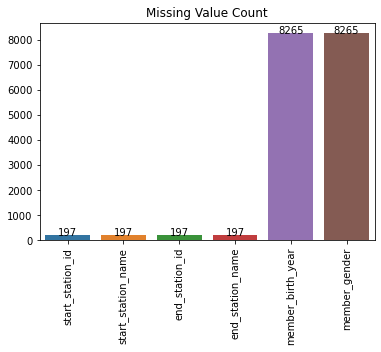

In [7]:
sb.barplot(x = na_counts.index.values, y = na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# printing value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+300, count, ha = 'center', va='top')
    plt.title('Missing Value Count')

### Observation
The variables `member_birth_year` and `member_gender` have the most missing values in the dataset.

### Define 
Drop the null values in the dataset

### Code

In [8]:
# Dropping null values
ford_bike = ford_bike.dropna()

### Test

In [9]:
ford_bike.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
ford_bike.shape

(174952, 16)

In [11]:
# Check for dublicates in the dataset
ford_bike.duplicated().sum()

0

### Observation
The duration_sec column is in the wrong datatype

### Define
Convert the duration_sec column to time in seconds by substracting the `start_time` from `end_time`

### Code

In [12]:
duration = ford_bike['end_time'] - ford_bike['start_time']
ford_bike['duration_sec'] = duration.dt.total_seconds()

### Test

In [13]:
ford_bike['duration_sec']

0         52185.830
2         61854.928
3         36490.832
4          1585.525
5          1793.128
            ...    
183407      480.310
183408      313.758
183409      141.671
183410      139.927
183411      271.422
Name: duration_sec, Length: 174952, dtype: float64

### Observation
The `member_birth_year` column is in the wrong data type

### Define
Convert the `member_birth_year` column to datetime year type

### Code

In [14]:
# converting member_birth_year to datetime year type
birth_year = pd.to_datetime(ford_bike['member_birth_year'], format = '%Y').dt.year
ford_bike['member_birth_year'] = birth_year

### Test

In [15]:
ford_bike['member_birth_year']

0         1984
2         1972
3         1989
4         1974
5         1959
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 174952, dtype: int64

In [16]:
ford_bike.shape

(174952, 16)

### What is the structure of your dataset?
The Dataset after cleaning contains 174952 rows and 16 columns which include ( 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip') Most variables are numeric in nature, but the variables `user_type`, `member_gender`, `start_station_name`, `end_station_name`, `bike_share_for_all_trip` are qualitative.

### What is/are the main feature(s) of interest in your dataset?
I am most interested in knowing the features that are vital for determing the duration of rides in the dataset, and with that answer the following question:
* How long does the average trip take?
* Does the length of the trip depends on if a user is a subscriber or customer?
* When are most trips taken in terms of time of day or day of the week?
* Does age affect the duration of rides?
* which age makes the most use of the bikeshare?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* duration_sec
* start_time
* user_type
- member_gender
* member_birth_year
* bike_share_for_all_trip

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: `duration_sec`, by answering the question, How long does the average trip take? Then I will go on and look at the distribution and of the individual variables of interest (start_time, end_time, user_type, member_gender, member_birth_year)

### Question
How long does the average trip take?

In [17]:
ford_bike['duration_sec'].mean()

704.5017228496961

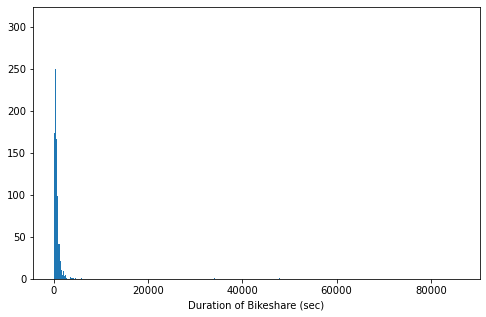

In [18]:
binsize = 1500
bins = np.arange(0, ford_bike['duration_sec'].max()+binsize )

plt.figure(figsize=[8, 5])
plt.hist(data = ford_bike, x = 'duration_sec', bins = bins)
plt.xlabel('Duration of Bikeshare (sec)')
plt.show()

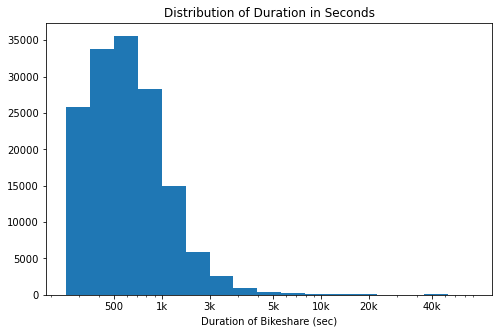

In [19]:
log_binsize = 0.15
bins = 10 ** np.arange(2.4, np.log10(ford_bike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_bike, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '3k', '5k', '10k', '20k', '40k'])
plt.xlabel('Duration of Bikeshare (sec)')
plt.title('Distribution of Duration in Seconds')
plt.show()

### Observation
Duration distribution is highly skewwed to the right, with a lot of the distribution on the low duration end. When plotted on a log-scale, there seems to be a peak between 500 and 1000. This means that the average trip lasted between 500 to 1000 seconds. Somewhere around 705 seconds. This answers the question of how long an average trip takes.

### Question
What is the distribution or ratio of user_type in most trips

In [20]:
# function for plotting a countplot
def countplot(df, var, title, label = None):
    """Plots a countplot of a given variable.
    Args:
    df (DataFrame): The pandas dataframe containing the variable
    var (Pandas series): The variable or column to be plotted
    title (str): The title of the countplot
    label (str): The xlabel of the countplot
    Returns:
    A countplot
    """
    base_color = sb.color_palette()[0] # selecting the default color 
    order = df[var].value_counts().index
    sb.countplot(data = df, x = var, order = order, color = base_color);
    plt.xlabel(label);
    plt.title(title);

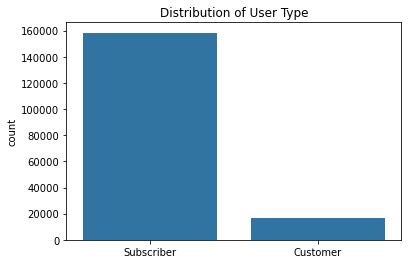

In [21]:
countplot(df = ford_bike, var = 'user_type', title = 'Distribution of User Type')

### Observation
From the result of the plot it shows that the ratio of daily/weekly subscribers are more than the customers.

### Question
What is the distribution of start_time. To answer this I have to separate start_time into different variables namely hour, session and week_day in order to have a better look at the distribution.

In [22]:
# getting the start_hour variable from start_time
hour = pd.to_datetime(ford_bike['start_time'], format = '%H:%S').dt.hour
ford_bike['hour'] = hour

In [23]:
# getting session variable from hour
bins = [0,4,11,12,20,23]
label = ['Mid Night','Morning','Afternoon','Evening','Night']
ford_bike['session'] = pd.cut(ford_bike['hour'], bins=bins, labels=label, include_lowest=True)

### Question
What is the distribution of start sessions for the rides?

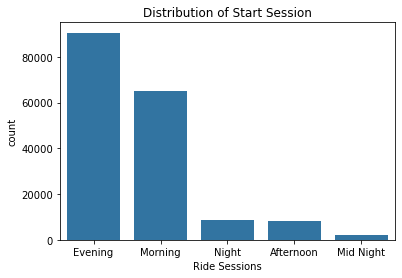

In [24]:
countplot(df = ford_bike, var = 'session', title = 'Distribution of Start Session', label='Ride Sessions')

### Observation 
Most of the ride sessions takes place in the evening then followed by the morning sessions. This could mean that most users are workers returning from work in the evening and going to work in the morning.

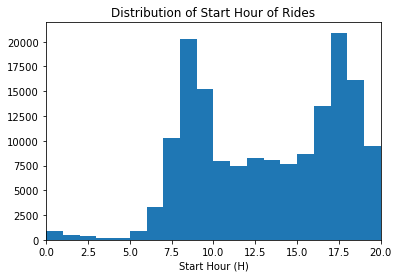

In [25]:
# Distribution of the start hour
binsize = 1
bins = np.arange(0, ford_bike['hour'].max()+binsize, binsize)
plt.hist(data=ford_bike, x='hour', bins=bins);
plt.xlim(0,20)
plt.xlabel('Start Hour (H)')
plt.title('Distribution of Start Hour of Rides');

### Observation
The distribution of start hour appears to be bi-modal, with the first peek appearing between 8am and 9am in the morning and the second peek which is the highest, appearing between 5pm and 6pm in the evening. This shows that more users are making trips in the morning and evening session.

In [26]:
# getting week_day variable from start_time
day = ford_bike['start_time'].dt.day_name()
ford_bike['week_day'] = day

### Question
What is the distribution of week_day in the dataset?

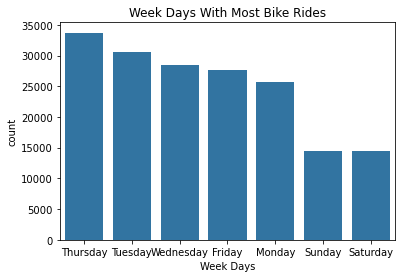

In [27]:
countplot(df = ford_bike, var = 'week_day', title = 'Week Days With Most Bike Rides', label='Week Days')

### Observation
Thursday appears to be the day of the week with the most bike rides, while Saturday and Sundays are the lowest. 

### Question
What is the distribution of bike_share_for_all_trip?

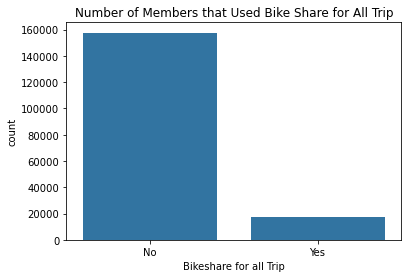

In [28]:
countplot(df = ford_bike, var = 'bike_share_for_all_trip', 
          title = 'Number of Members that Used Bike Share for All Trip', label='Bikeshare for all Trip')

### Observation
The members that used bikeshare for all trip are fewer than those who do not.

### Question
What is the distribution of member_gender in the dataset.

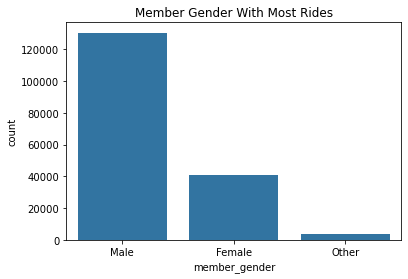

In [29]:
countplot(df = ford_bike, var = 'member_gender', title = 'Member Gender With Most Rides', label='member_gender')

### Observation 
The Male gender has the most bike rides

### Question
- What is the distribution of members' age  in the dataset. To answer this I have to find the member_age variable from the member_birth_year and start_time variable
- which age makes the most use of the bikeshare?

In [30]:
# getting the member_age variable by substracting the member_birth_year from start_time.
ford_bike['member_age'] = ford_bike['start_time'].dt.year - ford_bike['member_birth_year']

In [31]:
ford_bike['member_age'].value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
92         1
91         1
109        1
89         1
141        1
Name: member_age, Length: 75, dtype: int64

There are outliers in the member_age variable, It would be safe to filter the dataset to remove members whose age are from 90 years old and above.

In [32]:
# Filtering to select members who are below 90 years old
below_90 = ford_bike[ford_bike['member_age'] < 90]
ford_bike = below_90

In [33]:
ford_bike.shape

(174875, 20)

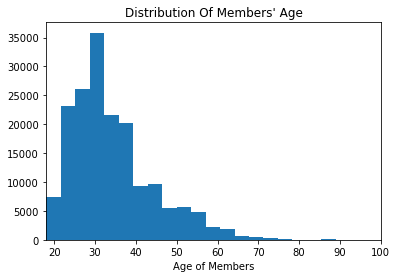

In [34]:
# Plotting a histogram of member_age distribution
plt.hist(data = ford_bike, x = 'member_age', bins=20);
plt.xlim(18,100);
plt.xlabel('Age of Members');
plt.title('Distribution Of Members\' Age');

### Observation
The distribution of member_age appears to be skewed on the right, with the peek between 25 and 30. This means the members of the bikeshare scheme are mostly youths. With very few senior citizens. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The `duration` variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, there seems to be a peak between 500 and 1000. This means that the average trip lasted between 500 to 1000 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The `start_time` variable has a generalized distribution, I had to separate start_time into different variables namely hour, session, week_day, in order to have a better look at the distribution. 

## Bivariate Exploration


### Question 
what is the relationship between member_age and duration_sec

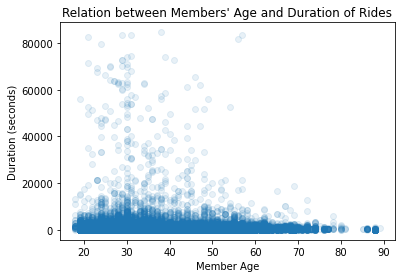

In [35]:
plt.scatter(data = ford_bike, x = 'member_age', y = 'duration_sec', alpha = 1/10);
plt.xlabel('Member Age');
plt.ylabel('Duration (seconds)');
plt.title('Relation between Members\' Age and Duration of Rides');

### Observation
Although the average ride duration falls around 705 seconds, members who are between 20 to 45 years old tend to have rides with the most duration above average. This answers the question, does age affect the duration of rides?

### Question
- What is the relationship of session and week_day to duration_sec
- When are most trips taken in terms of time of day or day of the week?

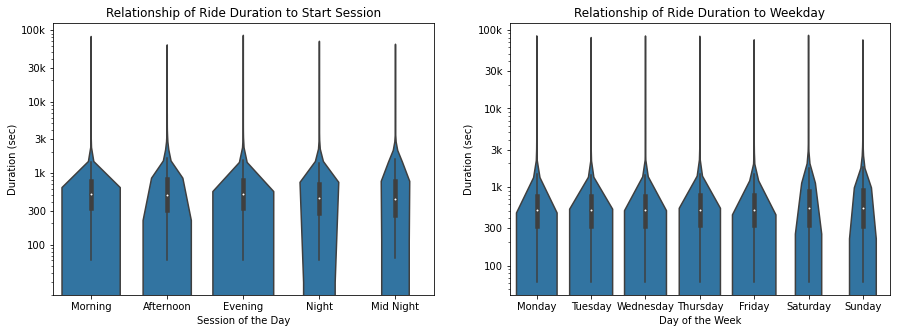

In [36]:
session = ['Morning', 'Afternoon', 'Evening', 'Night', 'Mid Night']

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Returns the types for session and week_day with the categories and orderedness
session_class = pd.api.types.CategoricalDtype(ordered=True, categories=session)
weekday_class =  pd.api.types.CategoricalDtype(ordered=True, categories=weekday)

# Use pandas.astype() to convert the session and week_day column from a plain object type into an ordered categorical type 
ford_bike['session'] = ford_bike['session'].astype(session_class);
ford_bike['week_day'] = ford_bike['week_day'].astype(weekday_class)

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 2, 1)
sb.violinplot(data=ford_bike, x='session', y='duration_sec', color=base_color);
plt.yscale('log');
plt.yticks([100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [100, 300, '1k', '3k', '10k', '30k', '100k']);
plt.xlabel('Session of the Day');
plt.ylabel('Duration (sec)');
plt.title('Relationship of Ride Duration to Start Session');
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.violinplot(data=ford_bike, x='week_day', y='duration_sec', color=base_color);
plt.yscale('log');
plt.yticks([100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [100, 300, '1k', '3k', '10k', '30k', '100k']);
plt.xlabel('Day of the Week');
plt.ylabel('Duration (sec)');
plt.title('Relationship of Ride Duration to Weekday');


### Observation
The highest duration of rides in the different sessions all fall between 1000 to 3000 seconds and the average duration falling between 500 and 1000, but the afternoon session appears to slightly have most duration. Same applies through out the weekdays with Saturdays and Sundays slightly having the most ride duration than other days. The plot shows a lot of outliers, which can be removed if need calls for it.

In [37]:
ford_bike.week_day.value_counts()

Thursday     33705
Tuesday      30567
Wednesday    28415
Friday       27644
Monday       25630
Sunday       14504
Saturday     14410
Name: week_day, dtype: int64

### Question
What is the relationship of user_type to member_age?

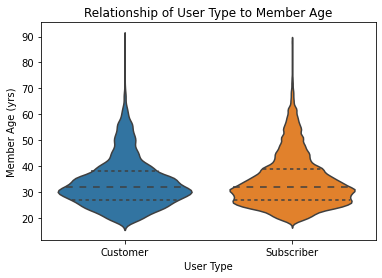

In [38]:

sb.violinplot(data = ford_bike, x = 'user_type', y = 'member_age', inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Member Age (yrs)');
plt.title('Relationship of User Type to Member Age');

### Observation
The two User categories shows a wider density between the age 26 to 36 and the median around 32 years of age. This indicates that a high number of both the customers and subcribers falls between this age bracket. 

### Question
What is the Relationship between hour to user type and hour to Member Gender.

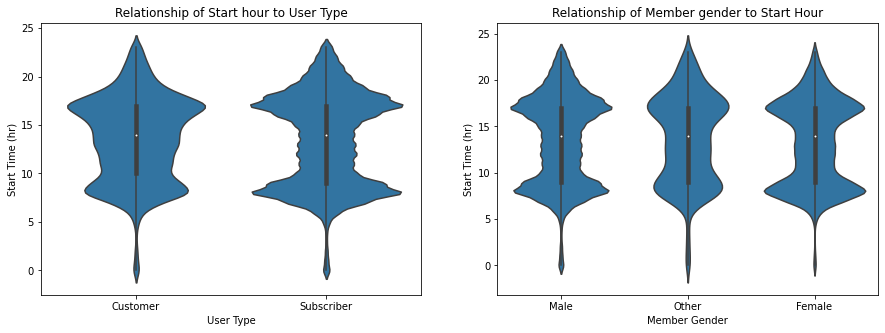

In [39]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# LEFT plot: box plot
plt.subplot(1, 2, 1)
sb.violinplot(data=ford_bike, x='user_type', y='hour', color=base_color);
plt.title('Relationship of Start hour to User Type');
plt.xlabel('User Type');
plt.ylabel('Start Time (hr)');
# RIGHT plot: violine plot
plt.subplot(1, 2, 2)
sb.violinplot(data=ford_bike, x='member_gender', y='hour', color=base_color);

plt.title('Relationship of Member gender to Start Hour');
plt.xlabel('Member Gender');
plt.ylabel('Start Time (hr)');


### Observation
The Customer and Subscriber user_type categories both shows a wider density around 8am and 17pm. This indicates that most customers and subscribers start their rides in the morning and evening time. The same applies across the different gender categories.

### Question 
What is the relationship between member_gender and duration_sec

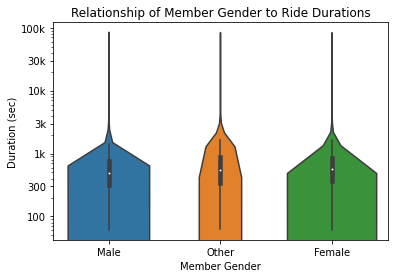

In [40]:
sb.violinplot(data = ford_bike, x = 'member_gender', y = 'duration_sec');
plt.yscale('log');
plt.yticks([100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [100, 300, '1k', '3k', '10k', '30k', '100k']);
plt.xlabel('Member Gender');
plt.ylabel('Duration (sec)');
plt.title('Relationship of Member Gender to Ride Durations');

### Observation
The Male and Female gender shows a wider density which indicates a peak between the duration of 500 to 1000 seconds, while the Other gender shows a little peak at this point and the point between 1k to 3k seconds. This could mean that the Other gender has more ride durations than the Male and Female Gender.

### Question
- What is the relationship between duration_sec and user_type? 
- Does the length of the trip depends on if a user is a subscriber or customer?

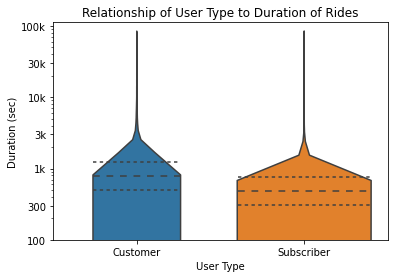

In [41]:
sb.violinplot(data = ford_bike, x = 'user_type', y = 'duration_sec', inner = 'quartile');
plt.yscale('log');
plt.yticks([100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [100, 300, '1k', '3k', '10k', '30k', '100k']);
plt.xlabel('User Type');
plt.ylabel('Duration (sec)');
plt.title('Relationship of User Type to Duration of Rides');

### Observation
The Customers has more ride durations or length of trips than the Subscribers.

### Question
What is the relationship between member_gender and user_type

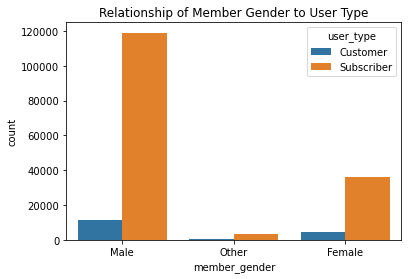

In [42]:
sb.countplot(data = ford_bike, x = 'member_gender', hue='user_type');
plt.title('Relationship of Member Gender to User Type');

### Observation
There are more subscribers than customers among the different member genders. With the male gender having the most, followed by female gender.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- With relationship of `user_type` to `duration_sec` I observed that customers has more ride duration than subscribers
- With relationship of `member_gender` to `duration_sec`. The Other gender has more ride durations than the Male and Female Gender.
- The relationship of `duration_sec` to `week_day` shows that Saturdays and Sundays slightly have the most ride duration than other days.
- Relation between `member_age` and `duration_sec` shows that as the members age increases the duration of rides decreases.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is an interesting relationship between `user_type` and `member_age`. A high number of both the customers and subcribers falls between the age bracket of 25 to 35 years.

## Multivariate Exploration


### Question 
What is the relationship between `member_gender`, `duration_sec` and `user_type`?

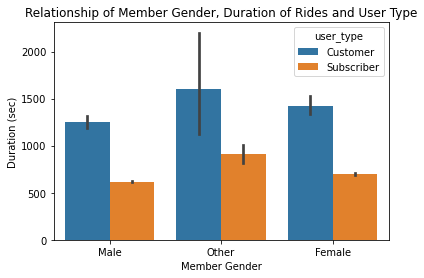

In [43]:
sb.barplot(data = ford_bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
plt.title('Relationship of Member Gender, Duration of Rides and User Type');
plt.xlabel('Member Gender');
plt.ylabel('Duration (sec)');

### Observation
The Customers who are of the Other gender has more ride durations than customers who are of male and female gender.

### Question 
What is the relationship of `session`, `duration_sec` and `member_gender`?

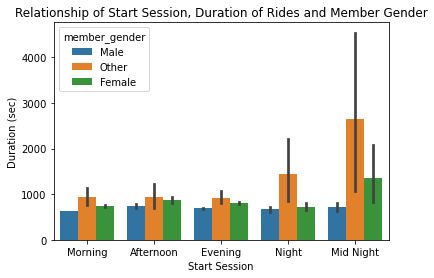

In [44]:
sb.barplot(data = ford_bike, x = 'session', y = 'duration_sec', hue = 'member_gender');
plt.title('Relationship of Start Session, Duration of Rides and Member Gender');
plt.xlabel('Start Session');
plt.ylabel('Duration (sec)');

### Observation
The Other gender has most ride durations taking place at midnight, and across all other sessions. The female gender has more ride durations across all sessions than the male gender.

### Question
What is the relationship between `user_type`, `member_gender` and `member_age` 

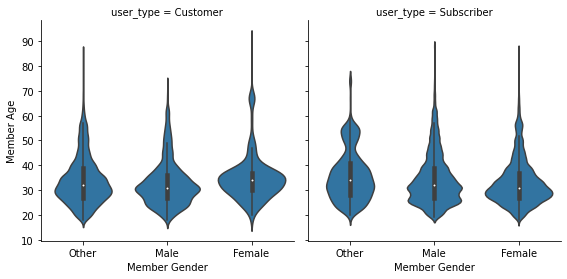

In [45]:
g = sb.FacetGrid(data = ford_bike, col = 'user_type', height = 4)
g.map(sb.violinplot, 'member_gender', 'member_age');
g.set(xlabel = 'Member Gender');
g.set(ylabel = 'Member Age');

### Observation
- The Female Customers whom most of their ages fall between 30 to 40 are more older than the customers who are Male and other gender with both age between 25 to 35. While Subscribers who are of the Other gender are the oldest of the subscribers.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Looking into the relationship between member_gender, duration_sec and user_type I observed that the Customers who are of the Other gender has more ride durations than customers who are of male and female gender. The relationship of session, duration_sec and member_gender shows that the Other gender has most ride durations taking place at midnight, and across all other sessions.  and the female gender has more ride durations across all sessions than the male gender.

### Were there any interesting or surprising interactions between features?
- The relationship between `user_type`, `member_gender` and `member_age` is insteresting because it shows that female customers are more older than the customers who are Male and other gender. While Subscribers who are of the Other gender are the oldest of the subscribers.


## Conclusions
This bike-sharing dataset covers only the greater San Francisco Bay area for february 2019.
From my findings on analyzing my variable of interest which is the duration of rides in seconds. I observed that there are factors which affects the duration of rides. Those factors include the member age, member gender, and user type (Customer or Subscriber).
The members who are older had less ride duration than younger members and the 'Other' gender tends to have more ride durations than the male and female gender. Also the Customers had more ride durations than the subscribers.
Most of the bike-sharing users are young members, the owners of the bike-sharing scheme should focus more on providing them a good user experience. The analysis of the dataset tells us that most rides occurs during morning and evening sessions, this could mean that users of the bike-sharing scheme in San Francisco Bay are workers. There are less female gender participating in the bike-sharing program, the owners of the scheme can target the female and other genders more in their marketing ads.
The bike-sharing scheme is very useful and it's going to continue expanding in the city and other cities outside San Francisco Bay area.